## Exploratary Data Analysis on Near Earth Objects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('neo.csv')

In [3]:
df.shape

(90836, 10)

In [4]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


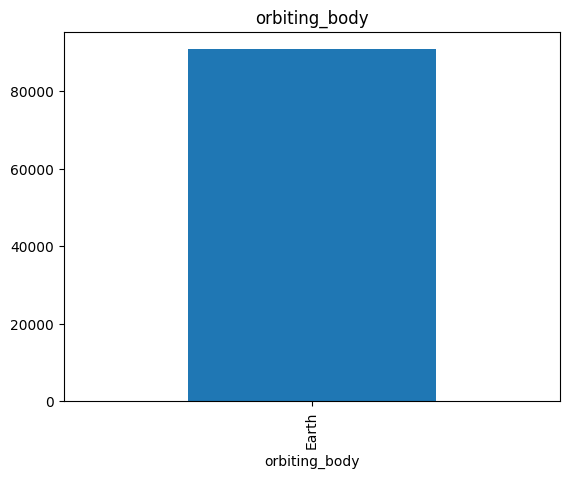

In [6]:
df.orbiting_body.value_counts().plot(kind='bar')
plt.title('orbiting_body')
plt.show()

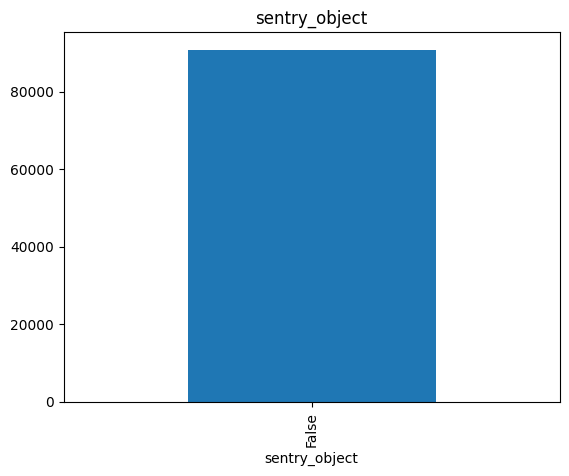

In [7]:
df.sentry_object.value_counts().plot(kind='bar')
plt.title('sentry_object')
plt.show()

In [8]:
df = df.drop(['orbiting_body','sentry_object'], axis=1)
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


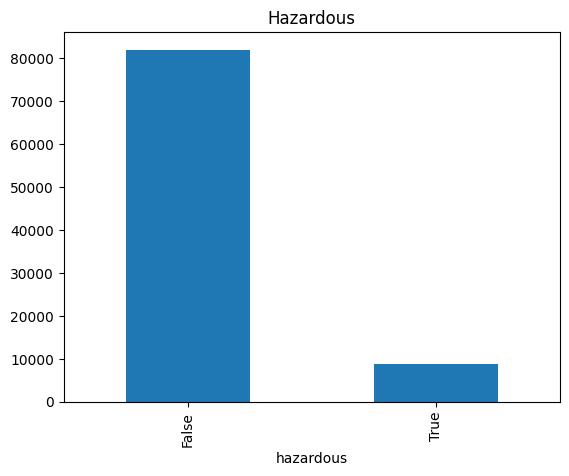

In [9]:
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

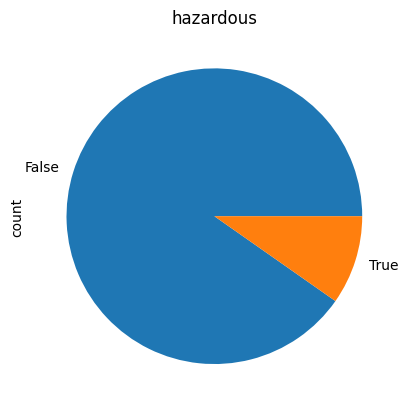

In [10]:
df.hazardous.value_counts().plot(kind='pie')
plt.title('hazardous')
plt.show()

In [11]:
# Checking for missing values
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [12]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object

In [14]:
numericals_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numericals_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


/Users/agastya/Documents/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


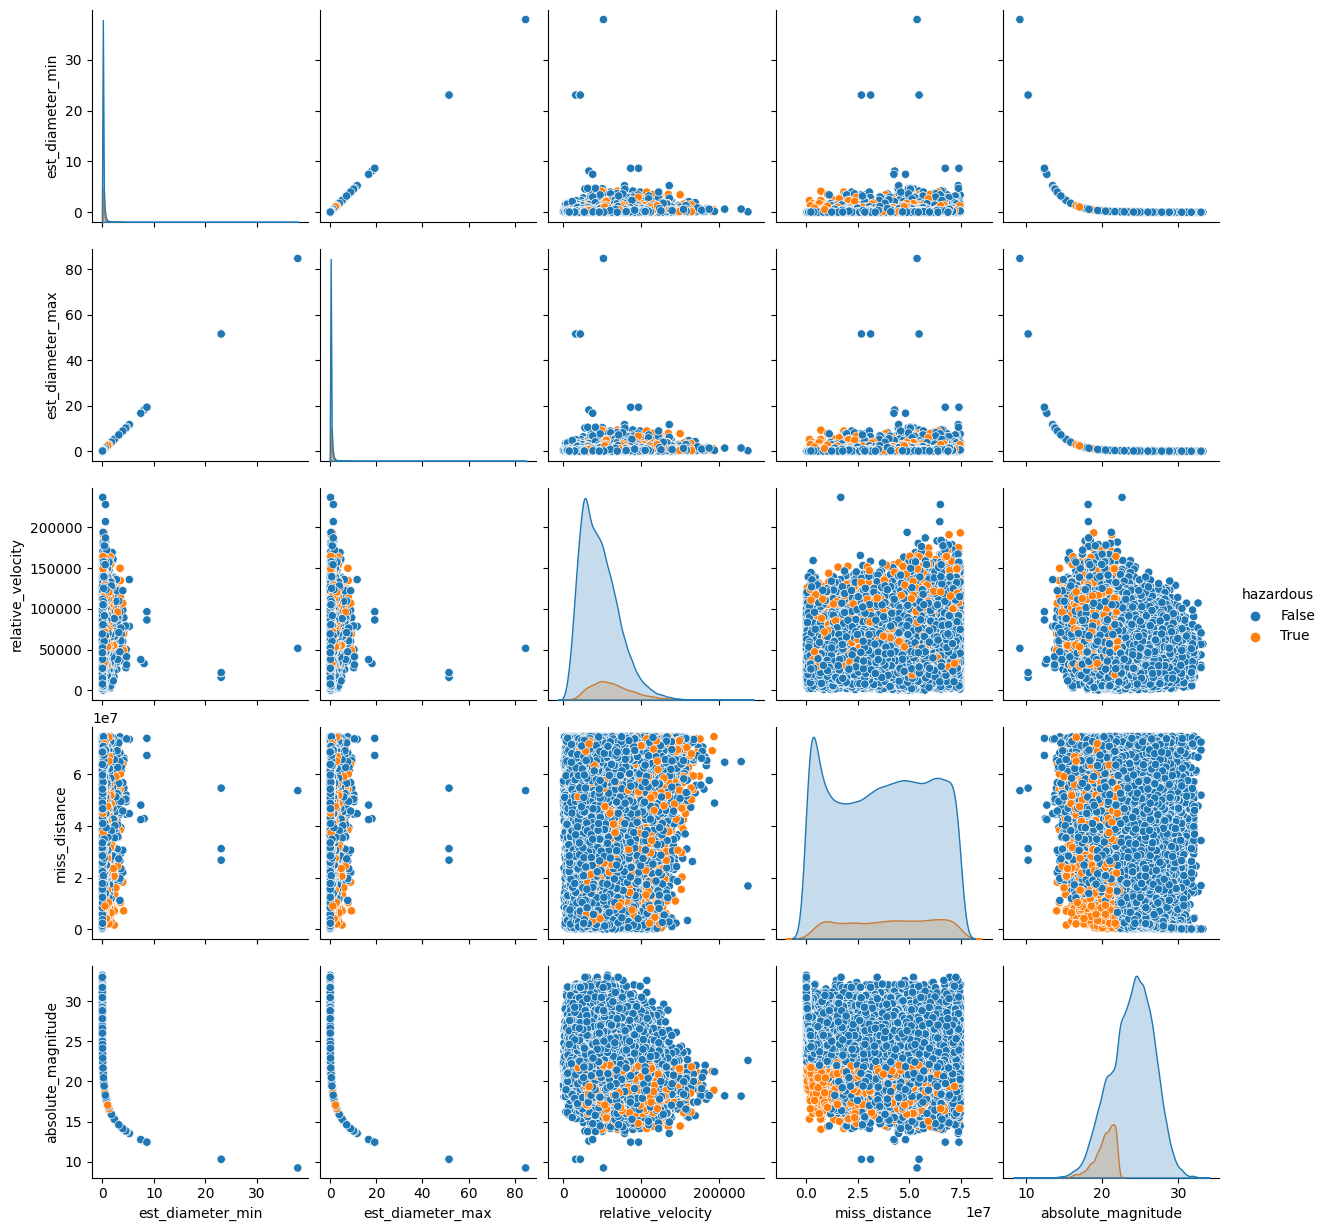

In [15]:
fig= sns.pairplot(df[numericals_df+['hazardous']],hue = 'hazardous')

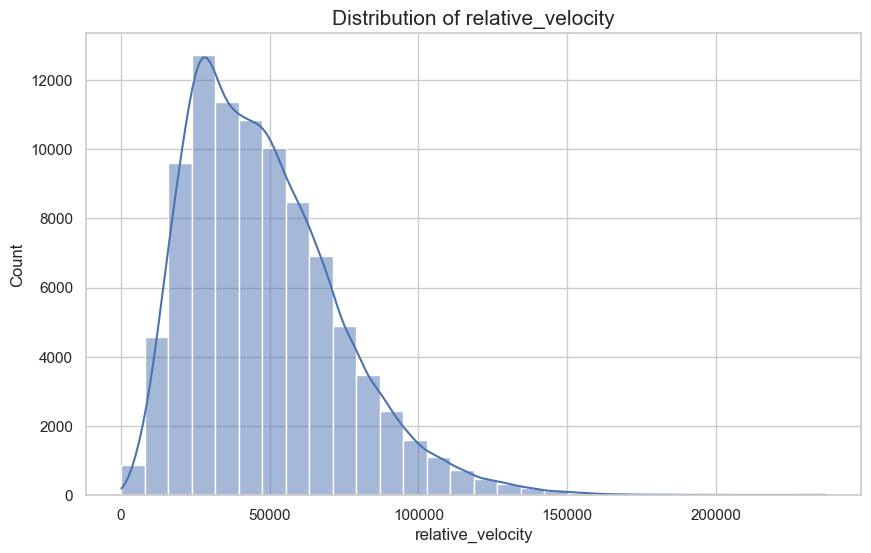

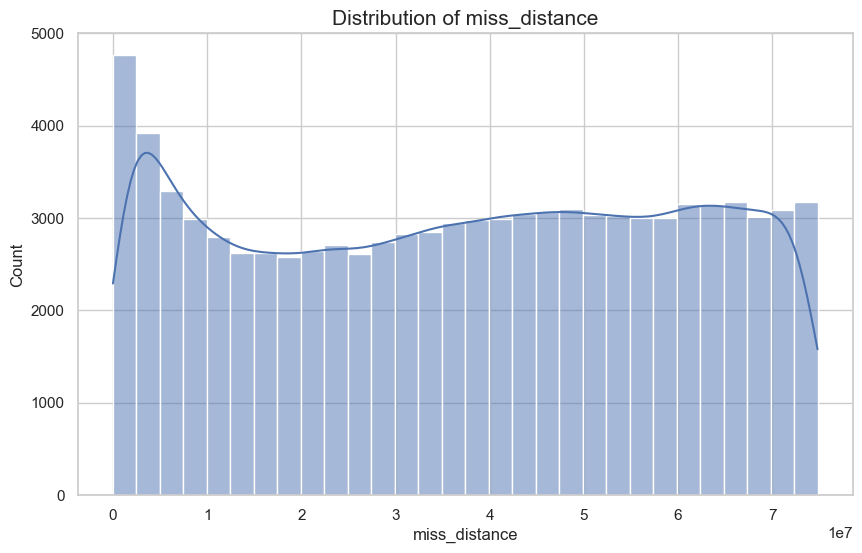

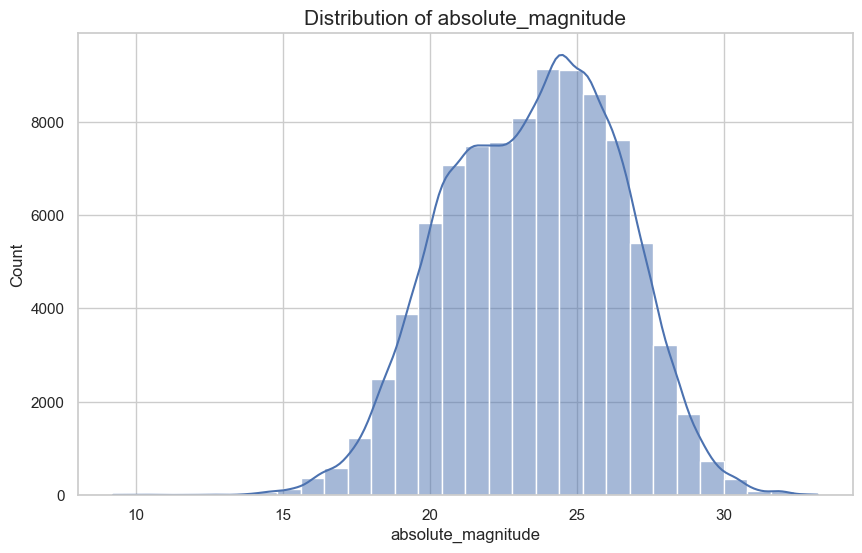

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a list of numerical columns
intresting_cols = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

# Plot histograms for each numerical column
for col in intresting_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.show()

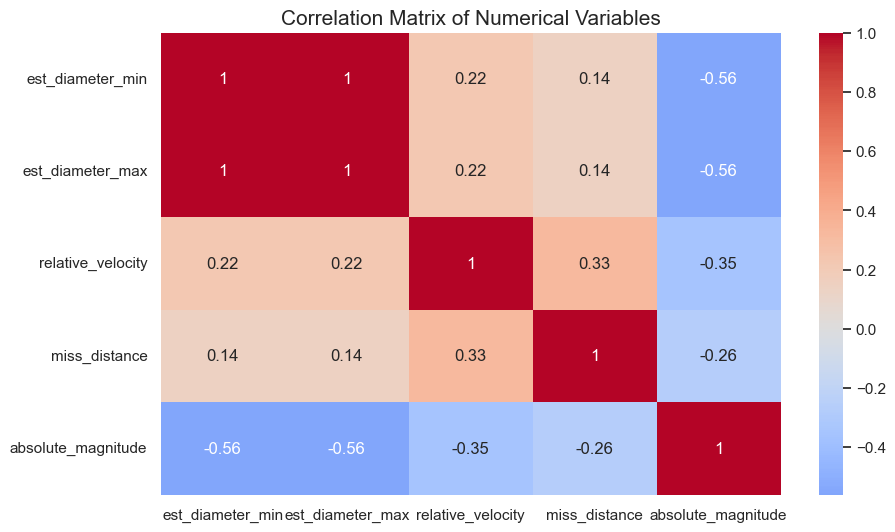

In [17]:
# Calculate the correlation matrix
corr_matrix = df[numericals_df].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables', fontsize=15)
plt.show()

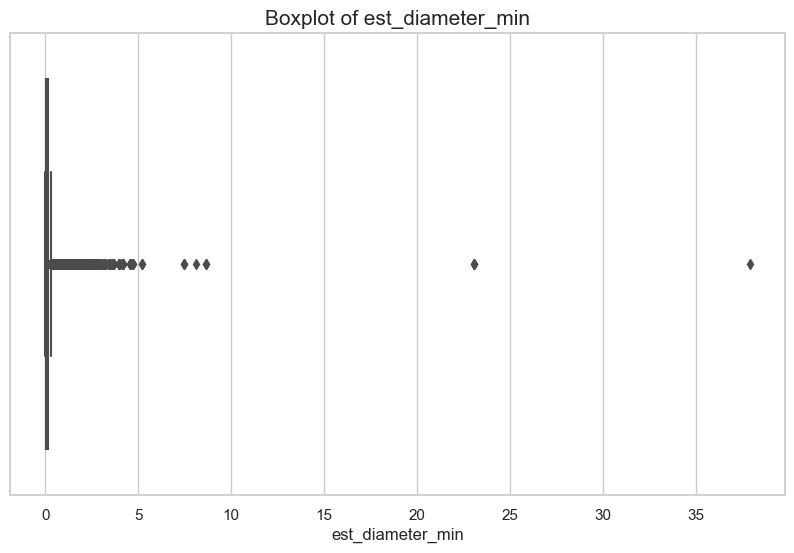

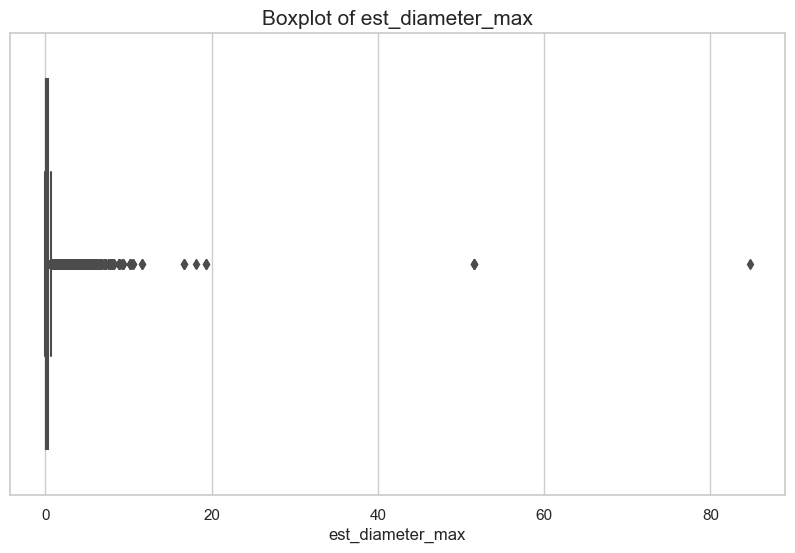

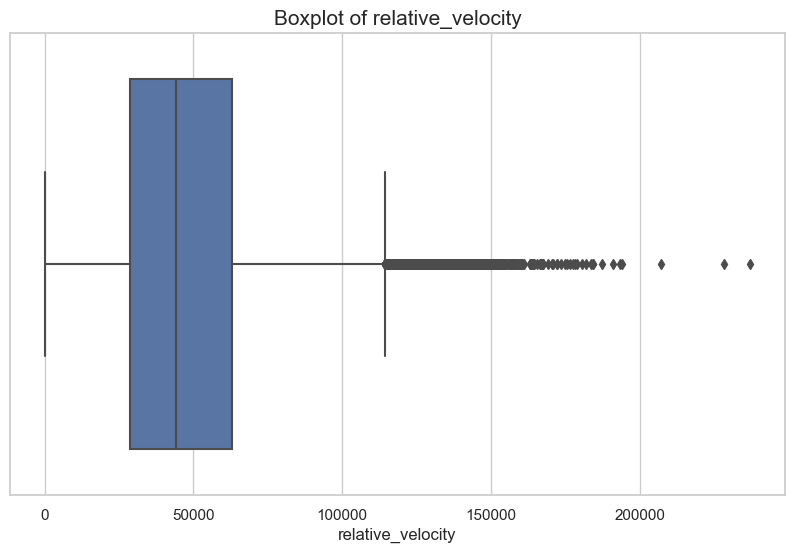

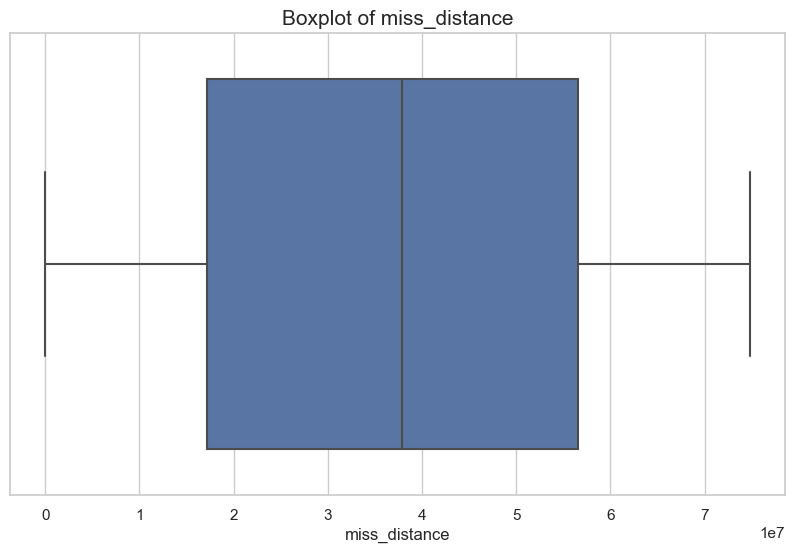

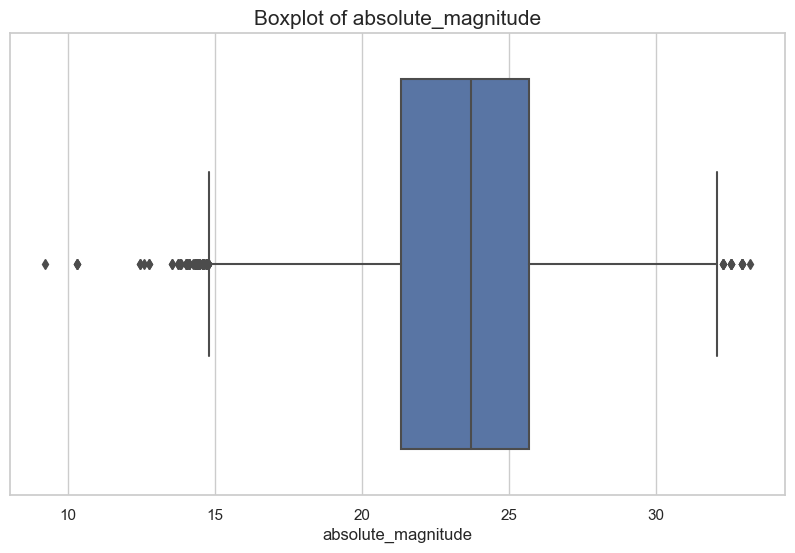

In [18]:
# Plot boxplots for each numerical column
for col in numericals_df:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=15)
    plt.show()

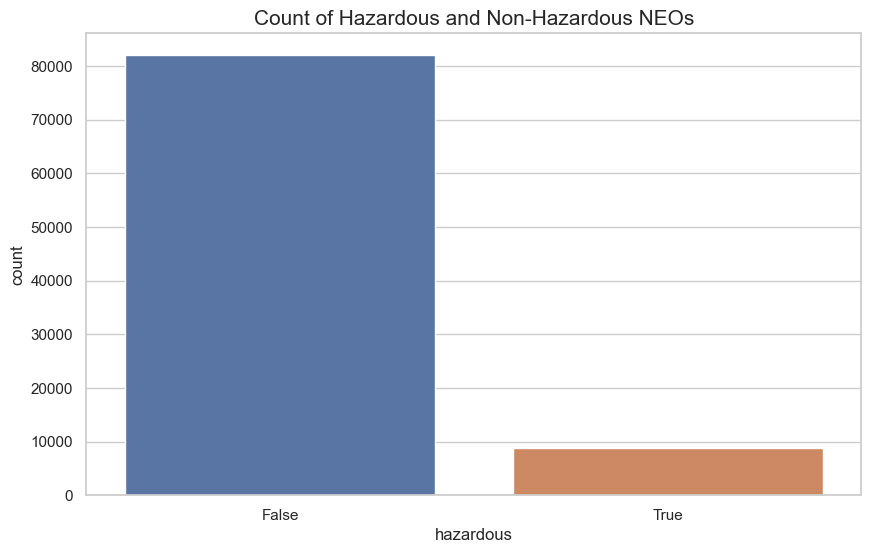

In [19]:
# Plot a bar plot for the 'hazardous' column
plt.figure(figsize=(10, 6))
sns.countplot(x=df['hazardous'])
plt.title('Count of Hazardous and Non-Hazardous NEOs', fontsize=15)
plt.show()


In [21]:
data=df

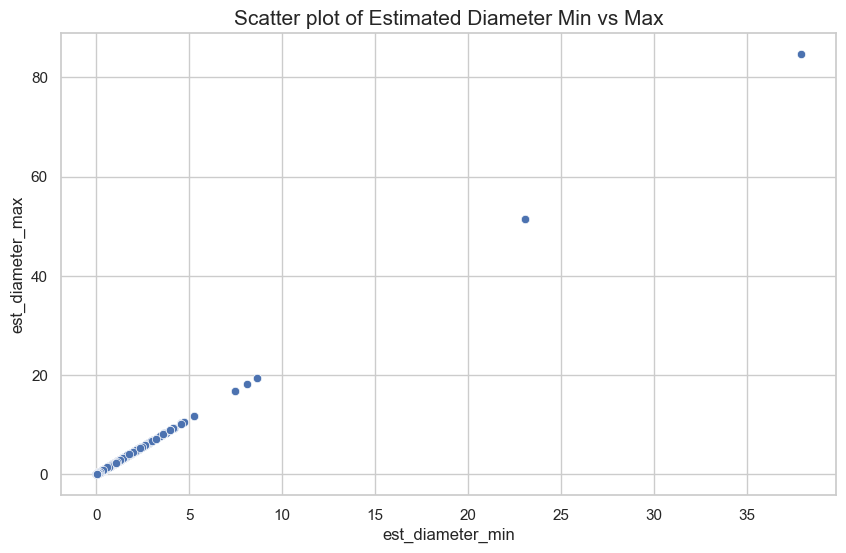

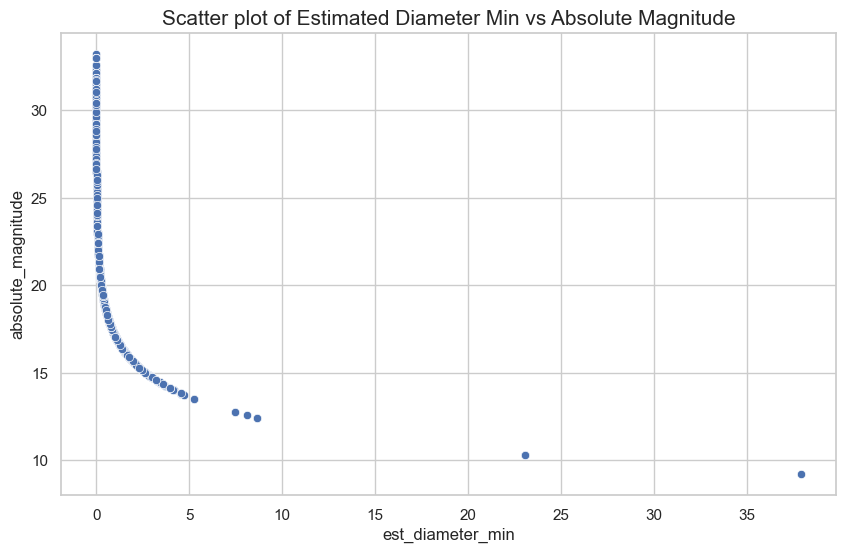

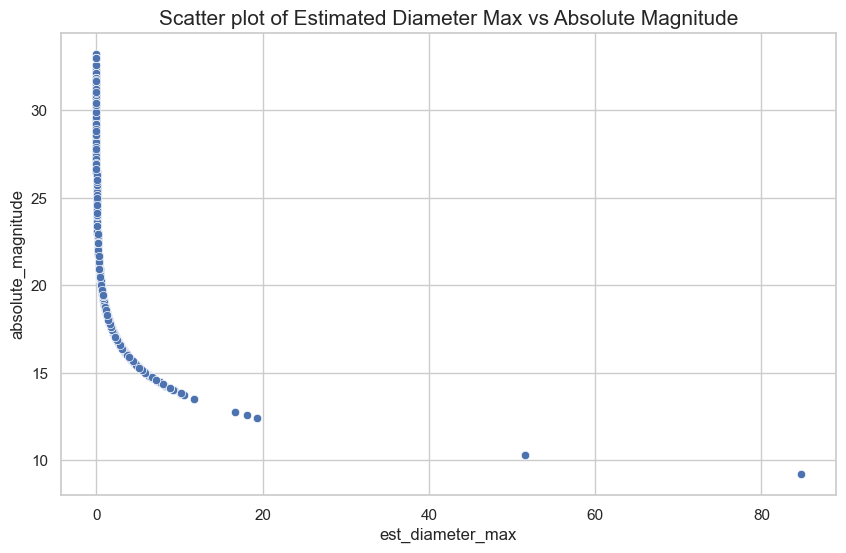

In [22]:
# Create scatter plots for the pairs of strongly correlated variables

# Pair 1: est_diameter_min and est_diameter_max
plt.figure(figsize=(10, 6))
sns.scatterplot(x='est_diameter_min', y='est_diameter_max', data=data)
plt.title('Scatter plot of Estimated Diameter Min vs Max', fontsize=15)
plt.show()

# Pair 2: est_diameter_min and absolute_magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='est_diameter_min', y='absolute_magnitude', data=data)
plt.title('Scatter plot of Estimated Diameter Min vs Absolute Magnitude', fontsize=15)
plt.show()

# Pair 3: est_diameter_max and absolute_magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='est_diameter_max', y='absolute_magnitude', data=data)
plt.title('Scatter plot of Estimated Diameter Max vs Absolute Magnitude', fontsize=15)
plt.show()

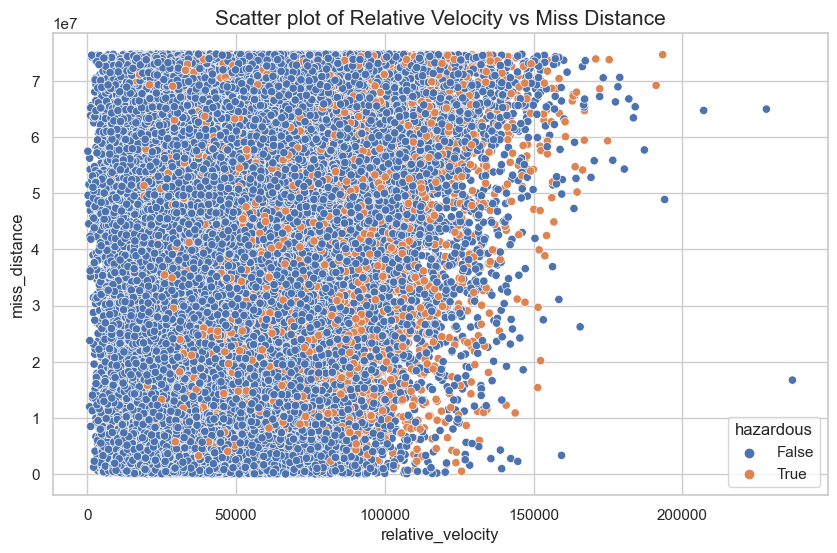

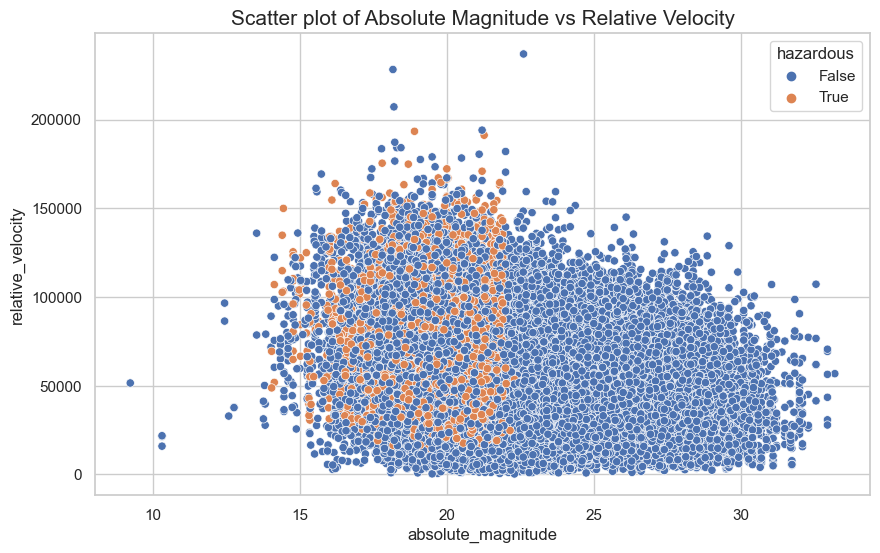

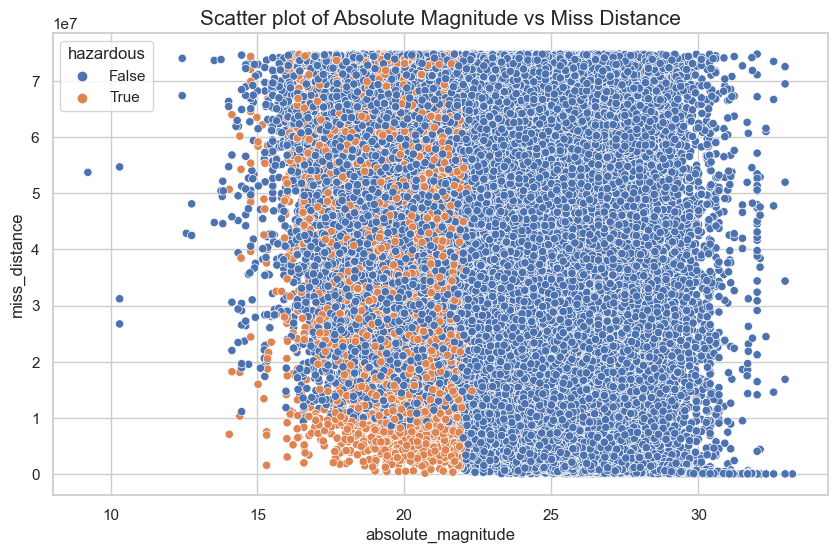

In [23]:
# Create scatter plots for other pairs of variables and color by 'hazardous'

# Pair 1: relative_velocity and miss_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='relative_velocity', y='miss_distance', hue='hazardous', data=data)
plt.title('Scatter plot of Relative Velocity vs Miss Distance', fontsize=15)
plt.show()

# Pair 2: absolute_magnitude and relative_velocity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absolute_magnitude', y='relative_velocity', hue='hazardous', data=data)
plt.title('Scatter plot of Absolute Magnitude vs Relative Velocity', fontsize=15)
plt.show()

# Pair 3: absolute_magnitude and miss_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absolute_magnitude', y='miss_distance', hue='hazardous', data=data)
plt.title('Scatter plot of Absolute Magnitude vs Miss Distance', fontsize=15)
plt.show()


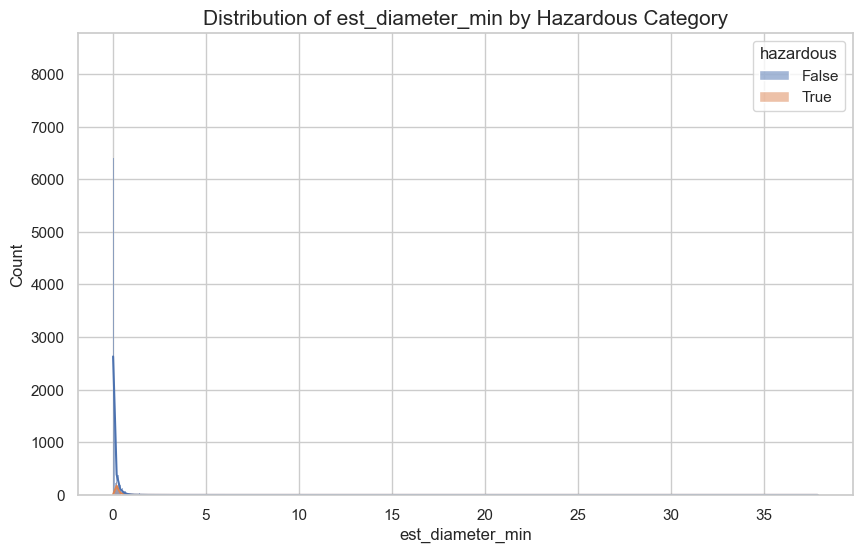

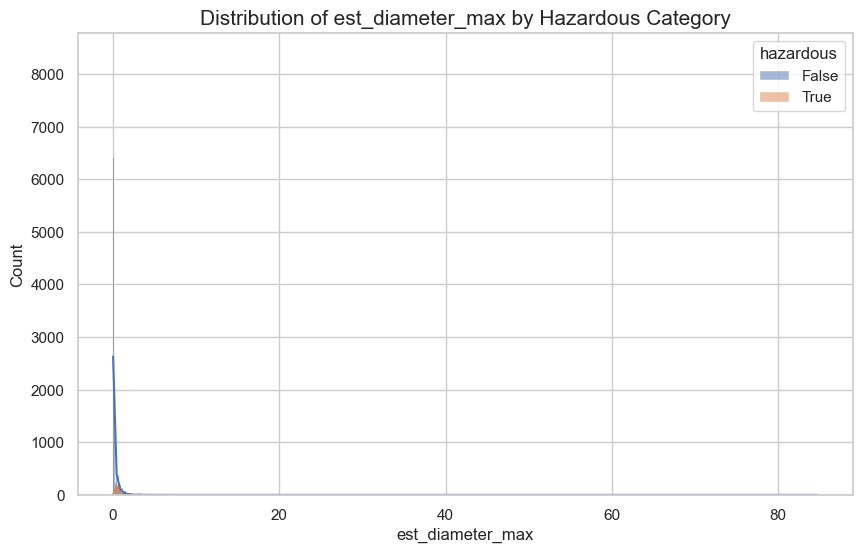

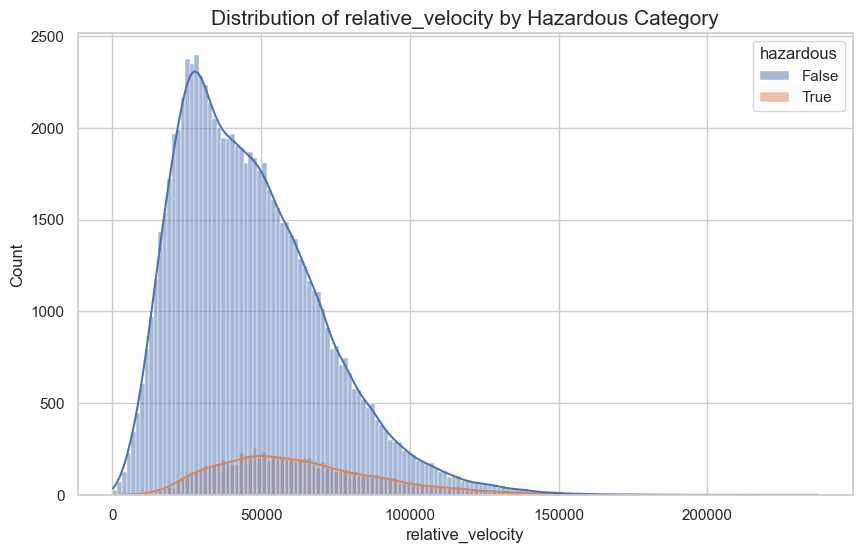

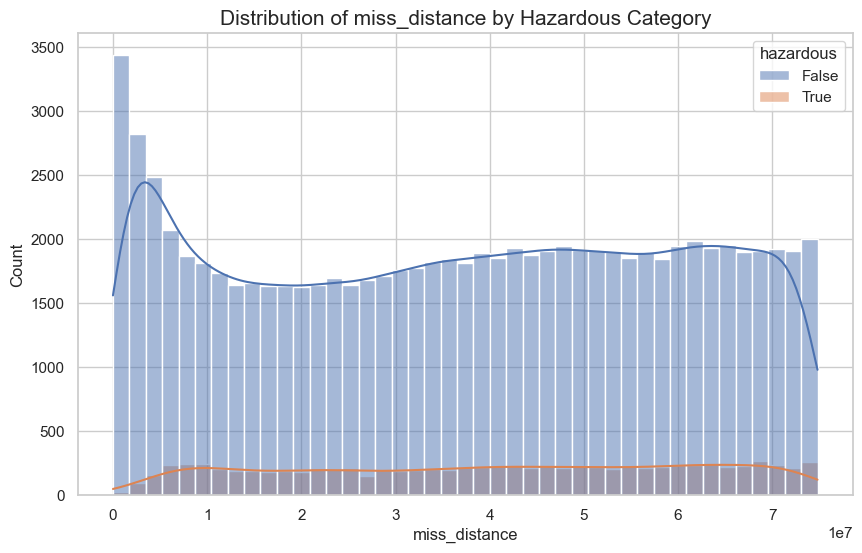

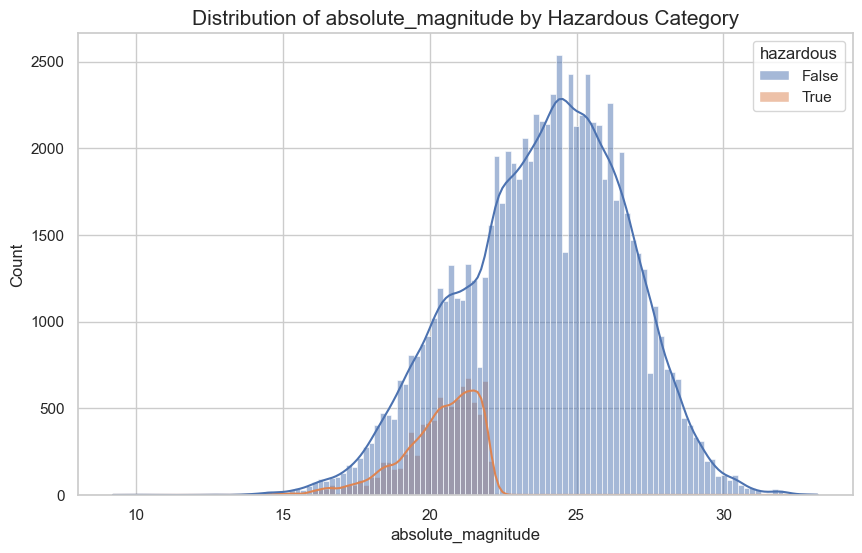

In [26]:
# Plot the distributions of numerical variables grouped by the 'hazardous' category
for col in numericals_df:
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=col, hue='hazardous', kde=True)
    plt.title(f'Distribution of {col} by Hazardous Category', fontsize=15)
    plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Reload the original data
data = pd.read_csv('neo.csv')

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Drop the 'orbiting_body' and 'sentry_object' columns
data.drop(['orbiting_body', 'sentry_object'], axis=1, inplace=True)

# Convert the 'hazardous' column to 0 and 1
data['hazardous'] = data['hazardous'].map({False: 0, True: 1})

# Apply the scaler to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the preprocessed dataset
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),0.031607,0.031607,0.056447,0.733141,0.312891,0
1,2277475,277475 (2005 WK4),0.006999,0.006999,0.309922,0.821364,0.449312,1
2,2512244,512244 (2015 YE18),0.019039,0.019039,0.481680,0.665740,0.358782,0
3,3596030,(2012 BV13),0.002531,0.002531,0.103726,0.339986,0.541093,0
4,3667127,(2014 GE35),0.006714,0.006714,0.179632,0.618634,0.453066,1


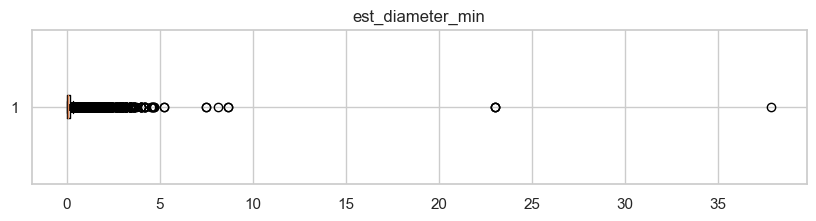

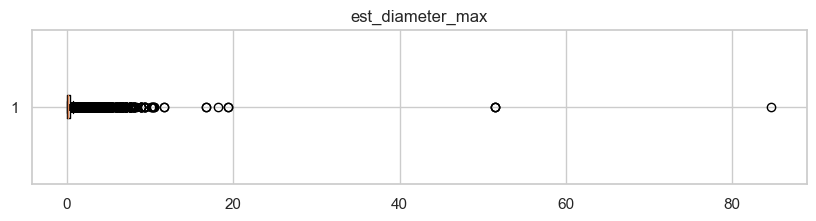

In [28]:
plt.figure(figsize=(10,2))
plt.boxplot(df.est_diameter_min, vert=False)
plt.title('est_diameter_min')
plt.show()
print()
plt.figure(figsize=(10,2))
plt.boxplot(df.est_diameter_max, vert=False)
plt.title('est_diameter_max')
plt.show()

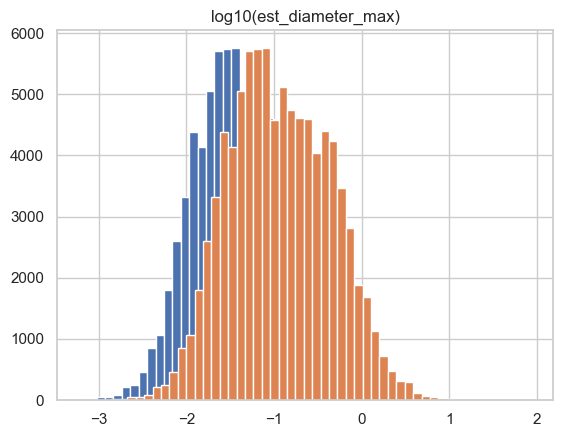

In [29]:
plt.hist(np.log10(df.est_diameter_min),50)
plt.title('log10(est_diameter_min)')
plt.grid()
plt.hist(np.log10(df.est_diameter_max),50)
plt.title('log10(est_diameter_max)')
plt.grid()

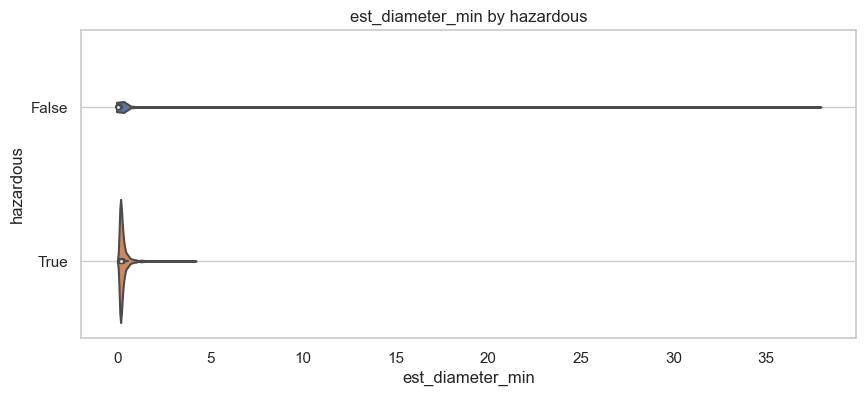

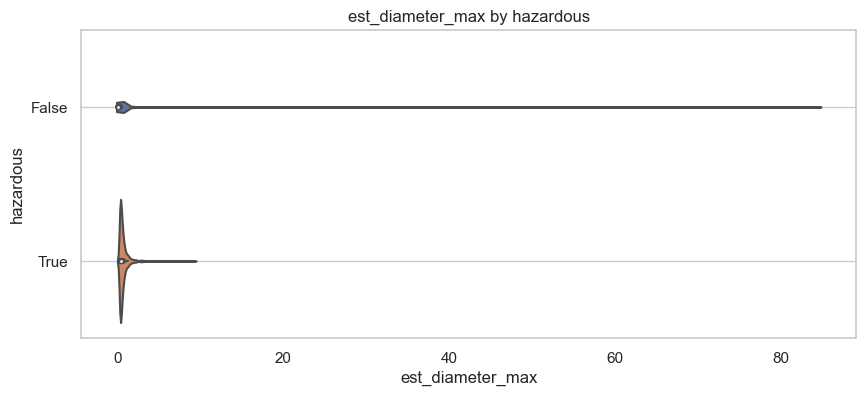

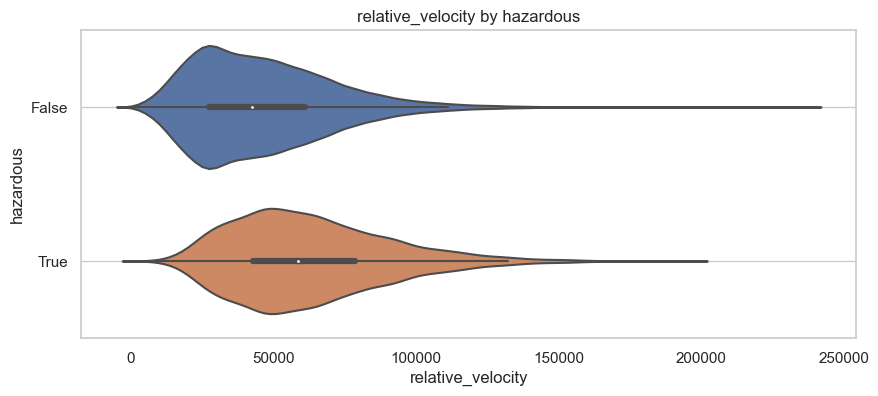

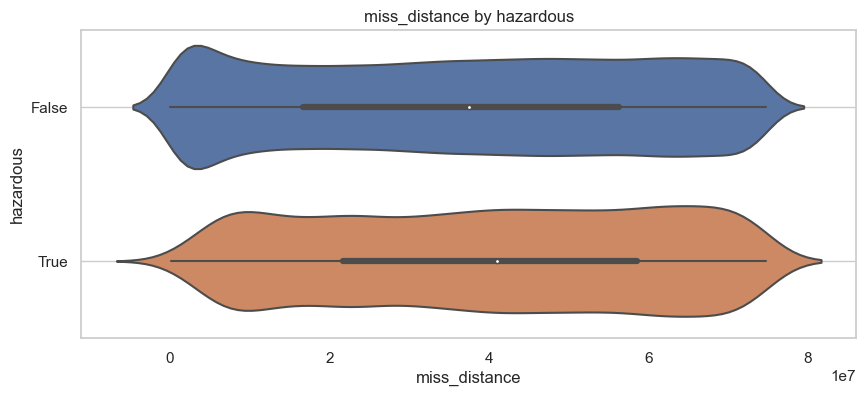

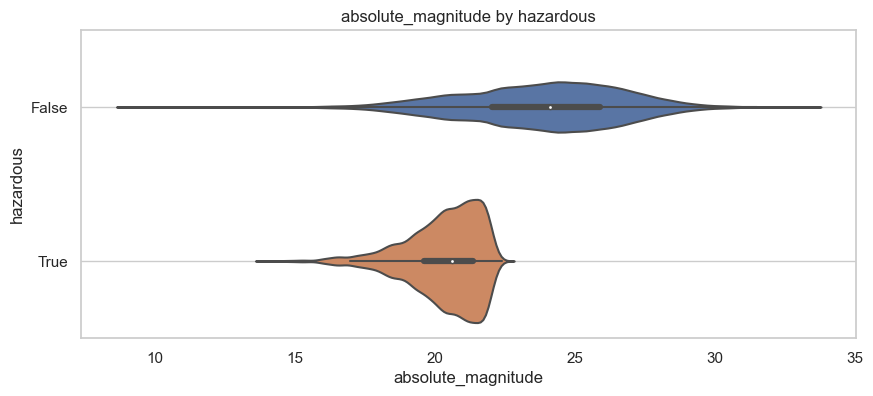

In [41]:
for f in numericals_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=f, y='hazardous', orient='h')
    my_title = f + ' by hazardous'
    plt.title(my_title)
    plt.grid()

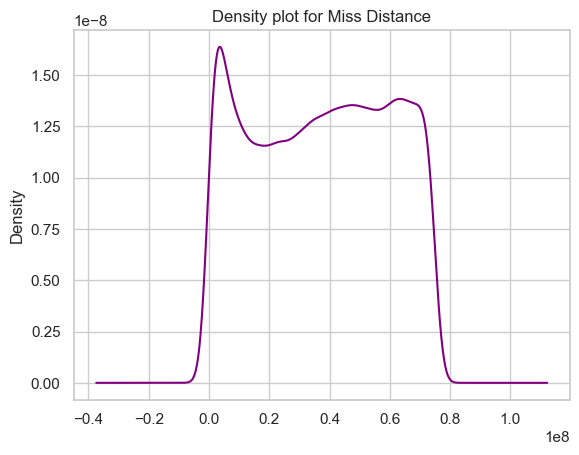

In [42]:
df.miss_distance.plot.density(color='purple')
plt.title('Density plot for Miss Distance')
plt.show()

# Tranining a Model

In [ ]:
data=df
data

In [31]:
data.drop(['id','name'],axis=1,inplace=True)
data = data[data.isna()==False]
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.031607,0.031607,0.056447,0.733141,0.312891,0
1,0.006999,0.006999,0.309922,0.821364,0.449312,1
2,0.019039,0.019039,0.481680,0.665740,0.358782,0
3,0.002531,0.002531,0.103726,0.339986,0.541093,0
4,0.006714,0.006714,0.179632,0.618634,0.453066,1


## Splitting the Data

In [32]:
x_data = data.drop(['hazardous'],axis=1)
y_data = data.hazardous

In [33]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
y = y_data

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.24,random_state=1)

In [35]:
from sklearn.metrics import classification_report

# Diffrent Types of Classifiers :

## KNN 

Calculating N-Neighbor: 1  Score: 0.8848217971652677
Calculating N-Neighbor: 2  Score: 0.9043621852208614
Calculating N-Neighbor: 3  Score: 0.8915646071281134
Calculating N-Neighbor: 4  Score: 0.9035365350213292
Calculating N-Neighbor: 5  Score: 0.8972982890693088
Calculating N-Neighbor: 6  Score: 0.9061052245309849
Calculating N-Neighbor: 7  Score: 0.900830237145085
Calculating N-Neighbor: 8  Score: 0.9067473969083987
Calculating N-Neighbor: 9  Score: 0.9017934957112059
Calculating N-Neighbor: 10  Score: 0.9075271776524013
Calculating N-Neighbor: 11  Score: 0.9039034906655657
Calculating N-Neighbor: 12  Score: 0.9087197834961699
Calculating N-Neighbor: 13  Score: 0.9066556579973396
Calculating N-Neighbor: 14  Score: 0.9089950002293473
Calculating N-Neighbor: 15  Score: 0.9073436998302831
Calculating N-Neighbor: 16  Score: 0.9094536947846429
Calculating N-Neighbor: 17  Score: 0.9085821751295812
Calculating N-Neighbor: 18  Score: 0.9103252144397046
Calculating N-Neighbor: 19  Score: 0.9

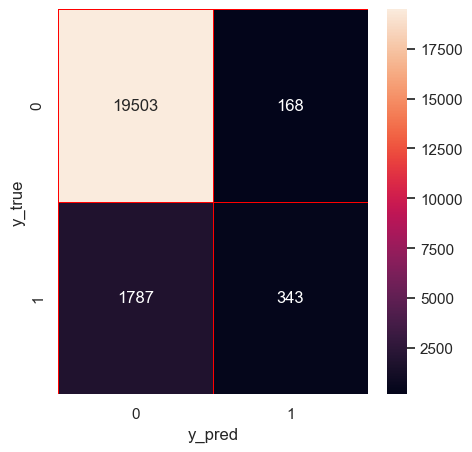

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     19671
           1       0.67      0.16      0.26      2130

    accuracy                           0.91     21801
   macro avg       0.79      0.58      0.61     21801
weighted avg       0.89      0.91      0.88     21801



In [36]:
from sklearn.neighbors import KNeighborsClassifier

n_scores = []
for each in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=each)
    KNN.fit(x_train,y_train)
    n_scores.append(KNN.score(x_test,y_test))
    print('Calculating N-Neighbor:',each,' Score:',n_scores[each-1])


Best_K = np.argmax(n_scores) + 1
print("KNN Classification")
print("N Neighbors:",Best_K)
print("Score:",np.max(n_scores))

KNN = KNeighborsClassifier(n_neighbors=Best_K)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
y_true = y_test

print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_true,y_pred)
import seaborn as sns 

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(ConfusionMatrix,annot = True,linewidth = 0.5,linecolor = 'red', fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print(classification_report(y_true,y_pred ))

## DecisionTree :

Decision Tree Classification
Score: 0.8953717719370671
Confusion Matrix:


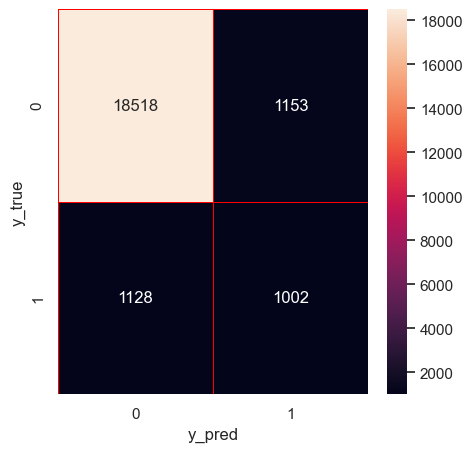

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     19671
           1       0.46      0.47      0.47      2130

    accuracy                           0.90     21801
   macro avg       0.70      0.71      0.70     21801
weighted avg       0.90      0.90      0.90     21801



In [37]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train,y_train)
print("Decision Tree Classification")
print("Score:",DecisionTree.score(x_test,y_test))

y_pred = DecisionTree.predict(x_test)
y_true = y_test

print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_true,y_pred)
import seaborn as sns 

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(ConfusionMatrix,annot = True,linewidth = 0.5,linecolor = 'red', fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print(classification_report(y_true,y_pred ))

## RandomForest :

Calculating N-Estimator: 10  Score: 0.9130773817714783
Calculating N-Estimator: 20  Score: 0.9150956378147791
Calculating N-Estimator: 30  Score: 0.9163799825696068
Calculating N-Estimator: 40  Score: 0.9177101967799642
Calculating N-Estimator: 50  Score: 0.9174808495023165
Calculating N-Estimator: 60  Score: 0.91711389385808
Calculating N-Estimator: 70  Score: 0.91711389385808
Calculating N-Estimator: 80  Score: 0.9170221549470208
Calculating N-Estimator: 90  Score: 0.9164258520251365
Calculating N-Estimator: 100  Score: 0.9168386771249025
Calculating N-Estimator: 110  Score: 0.9171597633136095
Calculating N-Estimator: 120  Score: 0.9170221549470208
Random Forest Classification
N Neighbors: 40
Score: 0.9177101967799642
Confusion Matrix:


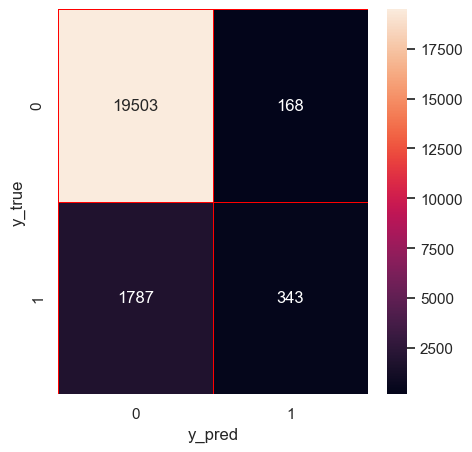

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     19671
           1       0.67      0.16      0.26      2130

    accuracy                           0.91     21801
   macro avg       0.79      0.58      0.61     21801
weighted avg       0.89      0.91      0.88     21801



In [38]:
from sklearn.ensemble import RandomForestClassifier


n_estimators = []
for each in range (10,130,10):
    RandomForest = RandomForestClassifier(n_estimators= each, random_state=1)
    RandomForest.fit(x_train,y_train)
    n_estimators.append(RandomForest.score(x_test,y_test))
    print('Calculating N-Estimator:',each,' Score:',n_estimators[int(each/10)-1])
    
Best_N = (np.argmax(n_estimators)+1)*10
print("Random Forest Classification")
print("N Neighbors:",Best_N)
print("Score:",np.max(n_estimators))

RandomForest = RandomForestClassifier(n_estimators= Best_N, random_state=1)
RandomForest.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
y_true = y_test

print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_true,y_pred)
import seaborn as sns 

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(ConfusionMatrix,annot = True,linewidth = 0.5,linecolor = 'red', fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print(classification_report(y_true,y_pred ))


## Gaussian Naive Bayes :

Naive Bayes Classification
Score:  0.8521627448282189
Confusion Matrix:


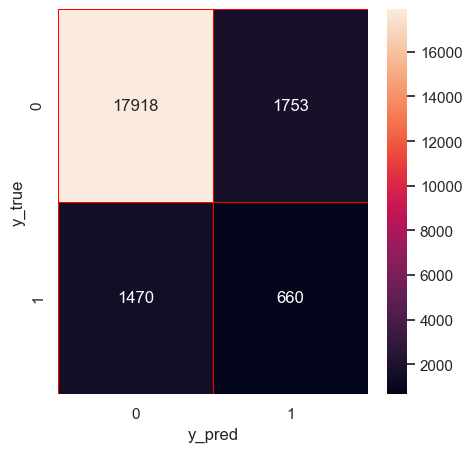

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     19671
           1       0.27      0.31      0.29      2130

    accuracy                           0.85     21801
   macro avg       0.60      0.61      0.60     21801
weighted avg       0.86      0.85      0.86     21801



In [39]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
print("Naive Bayes Classification")
print("Score: ",naive_bayes.score(x_test,y_test))

y_pred = naive_bayes.predict(x_test)
y_true = y_test

print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_true,y_pred)
import seaborn as sns 

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(ConfusionMatrix,annot = True,linewidth = 0.5,linecolor = 'red', fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print(classification_report(y_true,y_pred ))

## Logistic Regression :

In [40]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()

lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)

print("Accuracy of LR:",lr.score(x_test,y_test))
print(classification_report(y_test,lr_pred))

Accuracy of LR: 0.8972982890693088
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     19671
           1       0.36      0.07      0.11      2130

    accuracy                           0.90     21801
   macro avg       0.63      0.53      0.53     21801
weighted avg       0.85      0.90      0.86     21801



## Conclusions from Exploratory Data Analysis

1)Objects with smaller diameter have lesser probability of being hazardous and as the size of the object increases, the probability of being hazardous increases to its peak before starting to decline

2)As the relative velocity increases, the probability of the object being hazardous also increases.

3)Objects with absolute magnitude between 15 and 22 has more probability of being hazardous to earth when compared to other.

4)Objects and absolute magnitude follows a normal distribution.

5)Objects with Normalized Relative Velocity between 0.1 and 0.5 and Normalized absolute magnitude between 0.4 and 0.6 have more probability of being hazardous.


## Conclusions from diffrent Classifiers :

1)all most all of our models performed pretty good,we got a nice f1 scores and accuracy,but the NEO Data was very limited and the data we took is with out any missing values;there might be some outliers which leads to the wrong pridection.
